<a href="https://colab.research.google.com/github/treezy254/Algorithmic-Trading/blob/master/stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks'?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

'''


"\nWe'll be answering the following questions along the way:\n\n1.) What was the change in price of the stock over time?\n2.) What was the daily return of the stock on average?\n3.) What was the moving average of the various stocks?\n4.) What was the correlation between different stocks'?\n5.) How much value do we put at risk by investing in a particular stock?\n6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)\n\n"

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader 
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
techlist = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

for stock in techlist:
  globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE, GOOGLE, MICROSOFT, AMAZON']

for company, com_name, in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-22,95.099998,97.010002,94.800003,95.790001,95.790001,59534100,NaN
2023-02-23,96.120003,96.430000,93.669998,95.820000,95.820000,48467000,NaN
2023-02-24,93.529999,94.139999,92.320000,93.500000,93.500000,57053800,NaN
2023-02-27,94.279999,94.779999,93.139999,93.760002,93.760002,47470300,NaN
2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300,NaN
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500,NaN
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400,NaN
2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55695300,NaN
2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52008400,NaN


In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,150.277341,152.384166,148.347619,150.447262,149.932355,8.356204e+07
std,11.960089,11.891873,11.988462,11.981285,11.811327,2.387627e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.505898e+07
25%,142.120003,143.987495,139.974998,142.472496,141.981434,6.800405e+07
50%,148.924995,151.014999,147.264999,149.424995,148.966270,7.847850e+07
75%,158.662502,160.367500,154.954998,157.355003,156.649464,9.305808e+07
max,178.550003,179.610001,176.699997,178.960007,177.882431,1.826020e+08


# Information About the Data

.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-03-07 to 2023-03-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

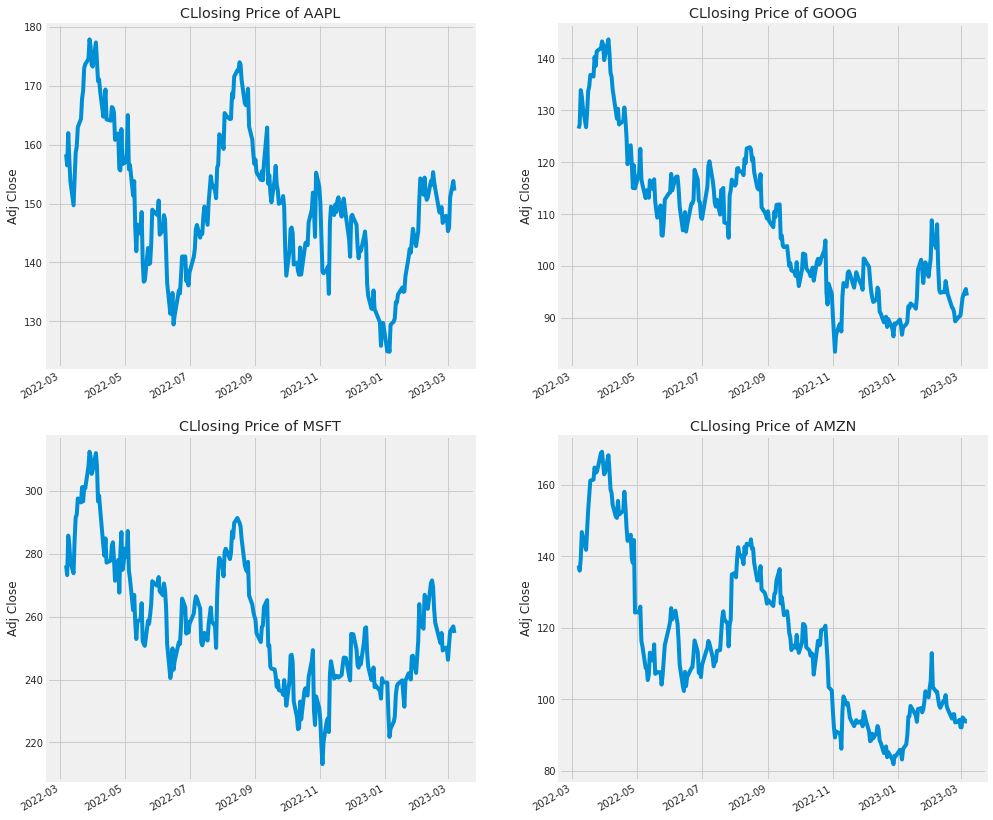

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"CLlosing Price of {techlist[i - 1]}")

## Volume of Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

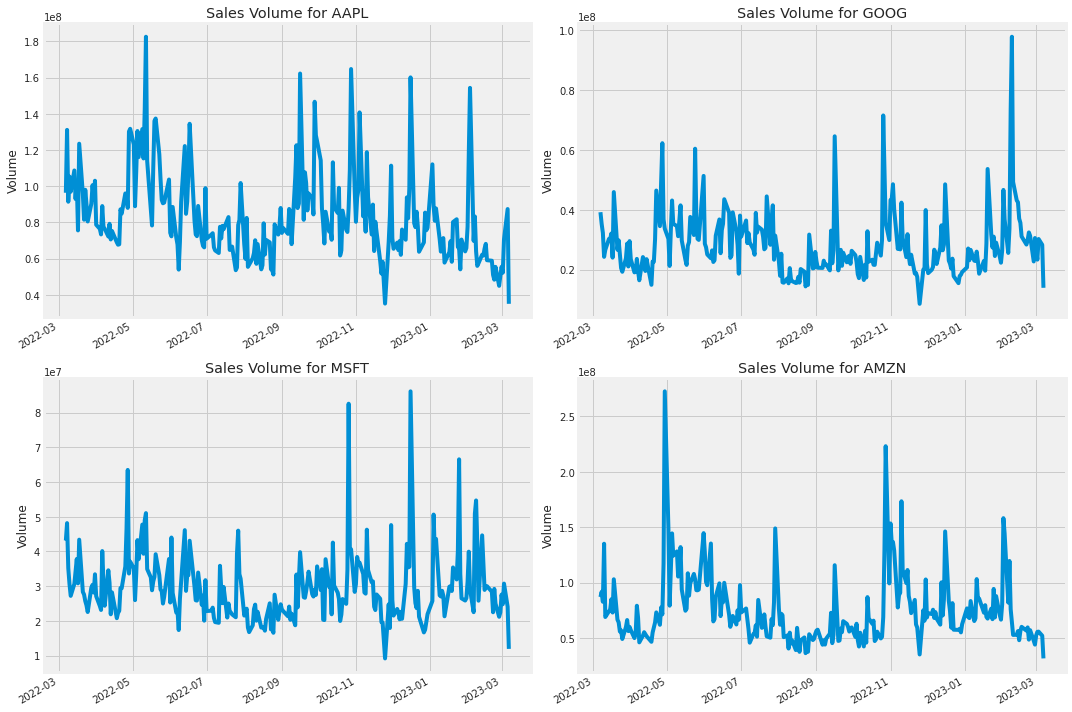

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {techlist[i - 1]}")


plt.tight_layout()

## 2. What was the moving average of various stocks

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

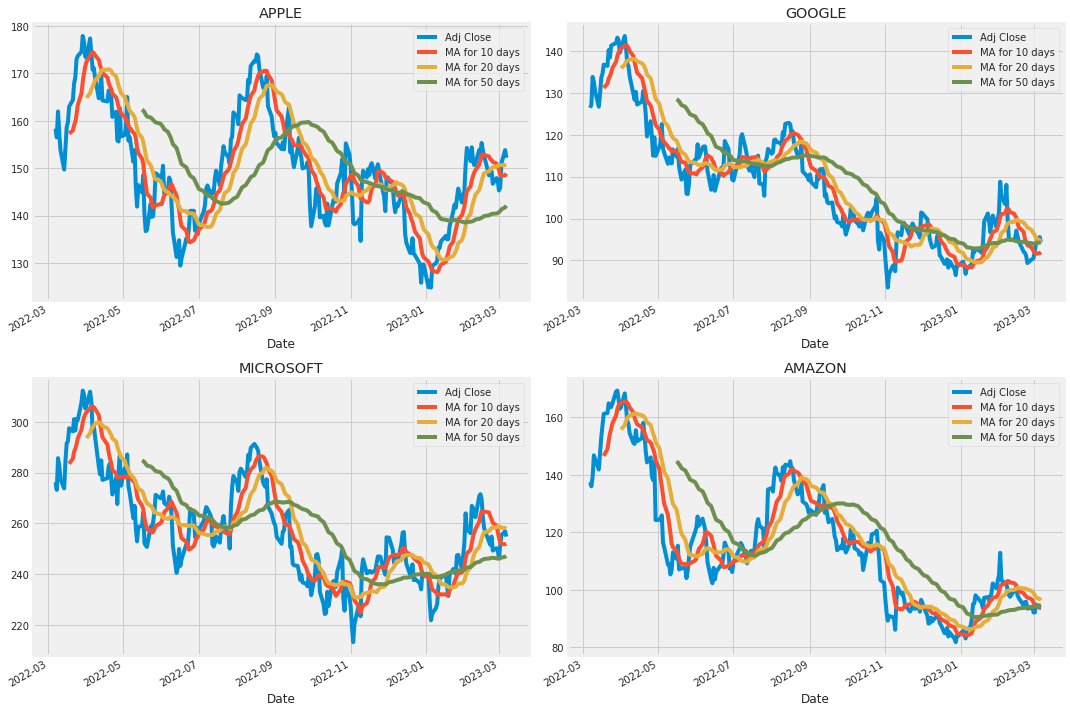

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean() 

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

plt.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

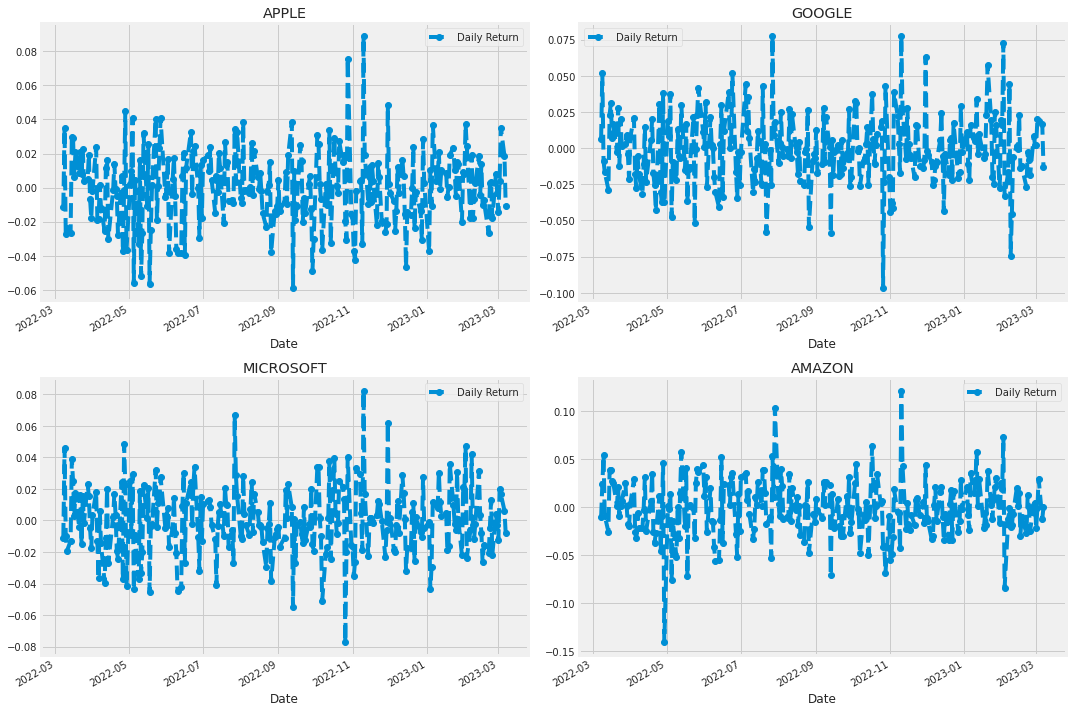

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

# Then we will plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

IndexError: ignored

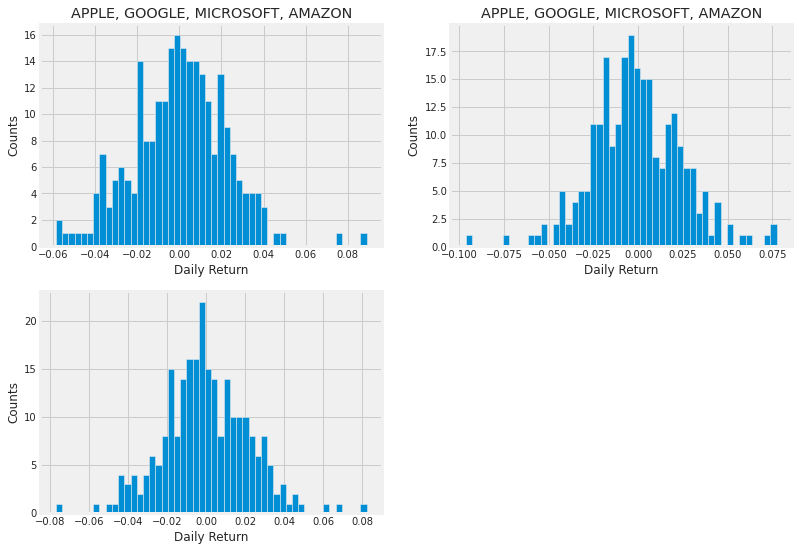

In [36]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i + 1)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4. What was the correlation between  different stocks pricing closing prices

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
yf.pdr_override()

closing_df = pdr.get_data_yahoo(techlist, start=start, end=end)['Adj Close']

# Make a new tech return Dataframe
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-07,NaN,NaN,NaN,NaN
2022-03-08,-0.011676,-0.010465,0.006437,-0.010971
2022-03-09,0.034997,0.024001,0.051757,0.045858
2022-03-10,-0.027186,0.054125,-0.008845,-0.010087
2022-03-11,-0.023909,-0.008807,-0.016630,-0.019329


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

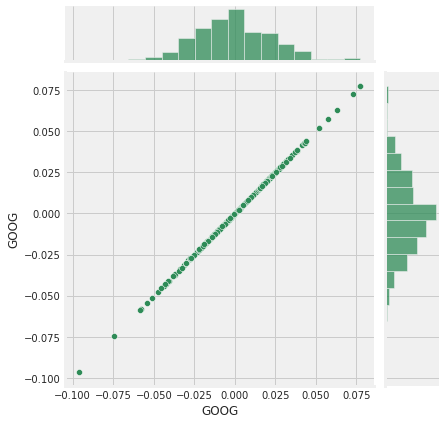

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


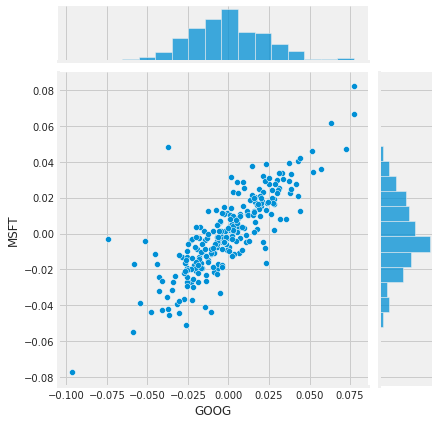

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

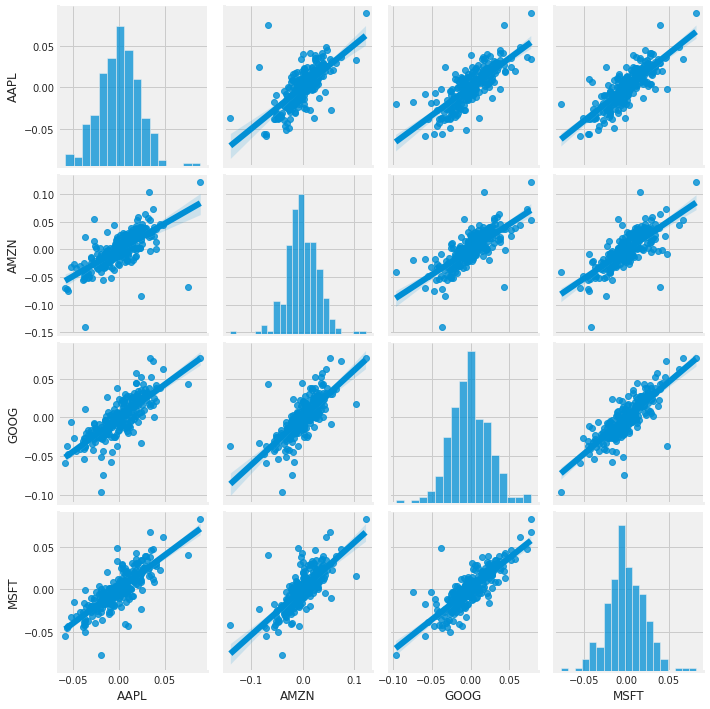

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

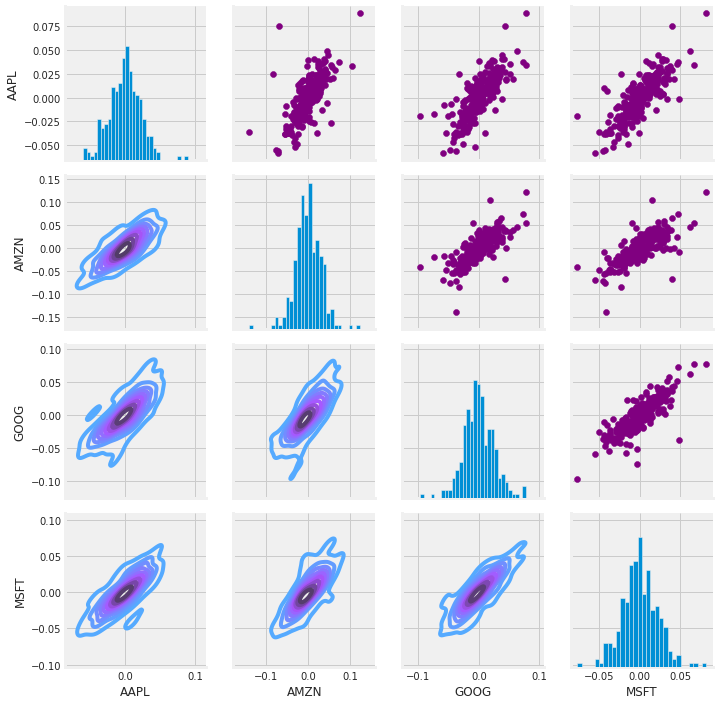

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

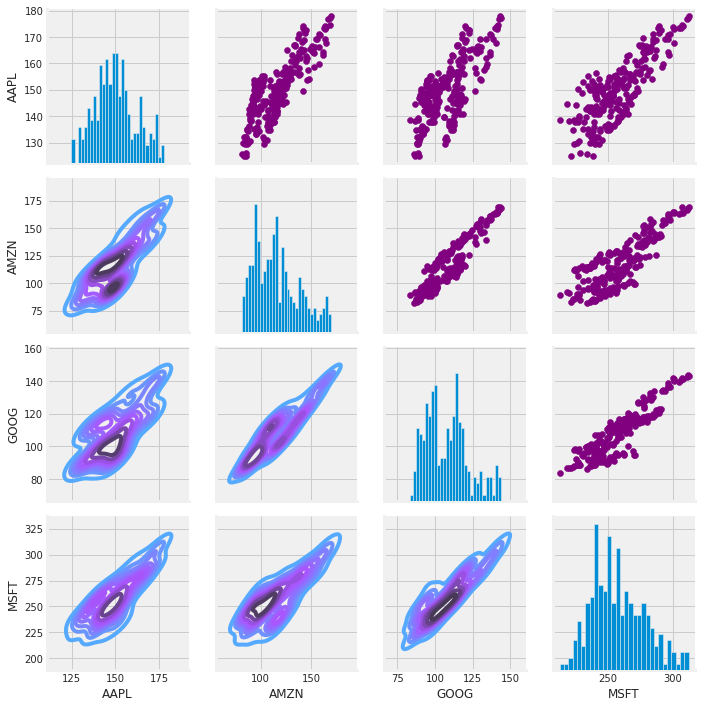

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

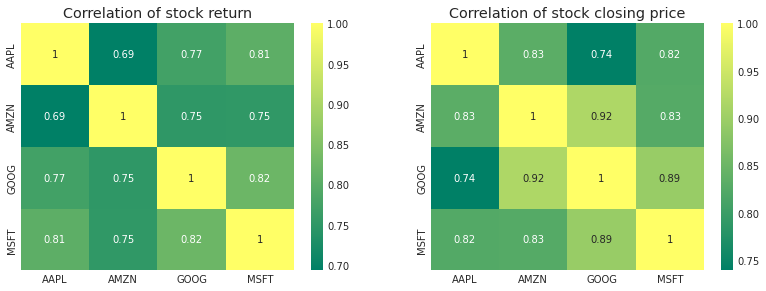

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')


Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

## 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

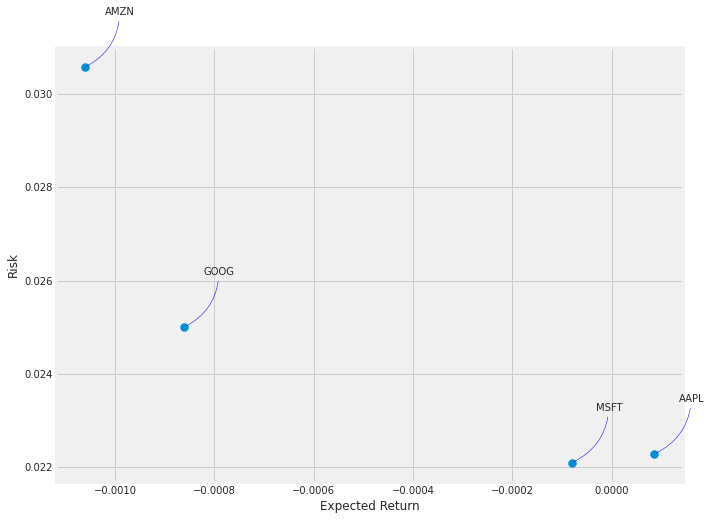

In [22]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
               arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))

## 6. Predicting the close price stock of APPLE inc.

In [23]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show tech data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500196,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567372,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706891,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839731,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819360,394024400
...,...,...,...,...,...,...
2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000
2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52238100
2023-03-03,148.039993,151.110001,147.330002,151.029999,151.029999,70668500


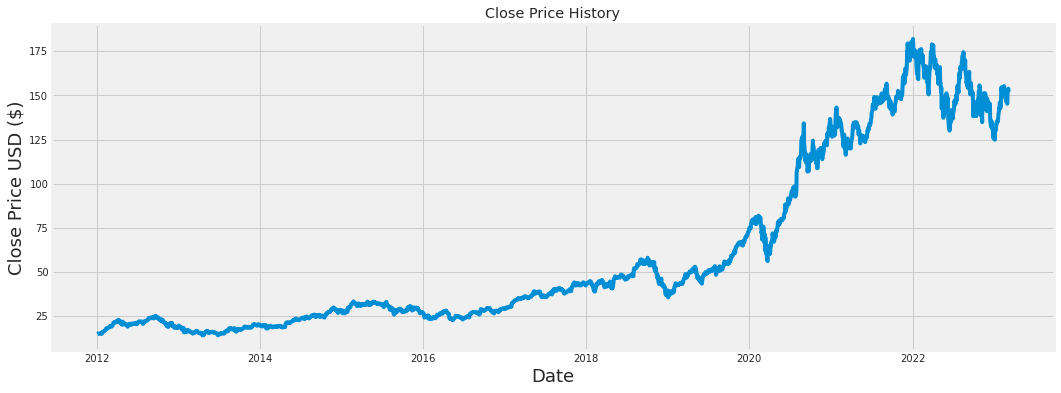

In [24]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the data on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

2672

In [26]:
# Scale the data
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.81566383],
       [0.83232432],
       [0.82184788]])

In [27]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i - 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(X_train)
    print(y_train)
    print()
    
# Convert the x_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_train.shape

[array([[0.00439887],
       [0.00486851],
       [0.00584391],
       [0.00677256],
       [0.00663019],
       [0.00695107],
       [0.00680444],
       [0.00655793],
       [0.00622217],
       [0.00726133],
       [0.00819848],
       [0.00790947],
       [0.0063263 ],
       [0.00783722],
       [0.00634968],
       [0.01192796],
       [0.01149658],
       [0.01205972],
       [0.01327737],
       [0.01401476],
       [0.01395314],
       [0.01372576],
       [0.01469479],
       [0.01560643],
       [0.01663922],
       [0.01830739],
       [0.02181161],
       [0.02186474],
       [0.02381555],
       [0.02527333],
       [0.0227679 ],
       [0.02373267],
       [0.02371354],
       [0.02641875],
       [0.02603411],
       [0.026746  ],
       [0.02802528],
       [0.02873719],
       [0.03078787],
       [0.03228178],
       [0.03271317],
       [0.03286405],
       [0.03030973],
       [0.02969346],
       [0.02978484],
       [0.03218616],
       [0.03286193],
       [0.03

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile (
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

2612/2612 [==============================] - 174s 65ms/step - loss: 0.0013


In [29]:
# Create teh testing data
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  X_test.append(test_data[i-60: i, 0])

# Convert the data to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the model predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Get the rppt squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 78ms/step


4.800460930683952

<ipython-input-31-60ee1c2a5f7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


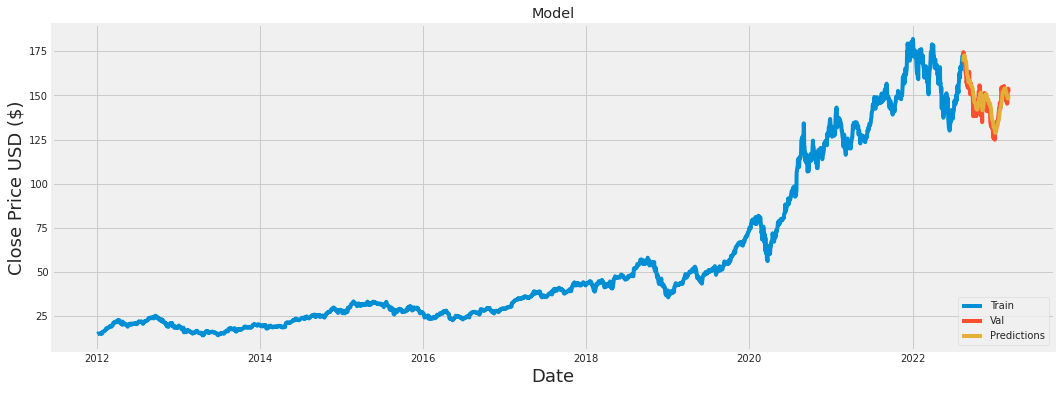

In [31]:
# Plot teh data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [33]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-08-16,173.029999,169.119614
2022-08-17,174.550003,170.325089
2022-08-18,174.149994,171.502197
2022-08-19,171.520004,172.422913
2022-08-22,167.570007,172.705719
...,...,...
2023-03-01,145.309998,149.613129
2023-03-02,145.910004,148.885681
2023-03-03,151.029999,148.295593
